In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression

In [33]:
db = pd.read_excel("forum.xlsx", sheet_name=0)

In [34]:
summary = db.describe()

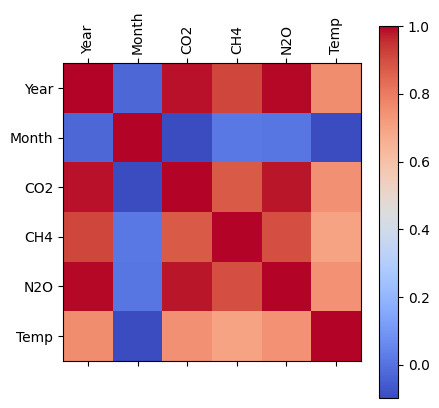

In [35]:
correlation_matrix = db.corr()
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

In [36]:
model = ols('Temp ~ CO2 + CH4 + N2O', data=db).fit()

In [37]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     134.0
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           2.46e-55
Time:                        15:25:51   Log-Likelihood:                 222.97
No. Observations:                 308   AIC:                            -437.9
Df Residuals:                     304   BIC:                            -423.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2677      1.158     -3.686      0.0

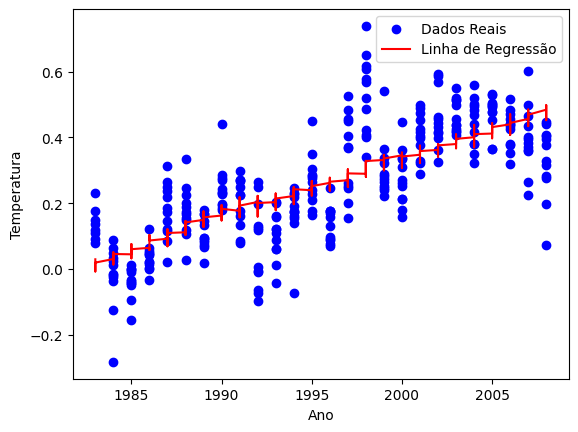

In [38]:
plt.scatter(db['Year'], db['Temp'], label='Dados Reais', color='blue')
plt.plot(db['Year'], model.predict(), label='Linha de Regressão', color='red')
plt.xlabel('Ano')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

In [39]:
model_multi = ols('Temp ~ CO2 + CH4 + N2O', data=db).fit()

In [40]:
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     134.0
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           2.46e-55
Time:                        15:25:51   Log-Likelihood:                 222.97
No. Observations:                 308   AIC:                            -437.9
Df Residuals:                     304   BIC:                            -423.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2677      1.158     -3.686      0.0

In [41]:
anova_results = anova_lm(model_multi)
print(anova_results)

             df    sum_sq   mean_sq           F        PR(>F)
CO2         1.0  5.516567  5.516567  395.607543  5.777772e-57
CH4         1.0  0.090212  0.090212    6.469309  1.147047e-02
N2O         1.0  0.000535  0.000535    0.038352  8.448684e-01
Residual  304.0  4.239142  0.013945         NaN           NaN
